**Lab Sheet 3: Text Classification Using Various Classification Techniques on IMDB Dataset**

Lab Objective:

The objective of this lab is to perform text classification on the IMDB movie reviews dataset using different classification techniques. By the end of this lab, you should be able to:

* Preprocess text data for classification.
* Apply various text classification algorithms in Python.
* Evaluate and compare the performance of these algorithms.
* Understand the strengths and weaknesses of each classification technique.



1.   Dataset Preparation

*  Load the IMDB Dataset: Use the IMDB dataset available from tensorflow_datasets or download it from a trusted source.



In [ ]:
import tensorflow_datasets as tfds

# Load the IMDB dataset
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']


* Convert to DataFrame: Convert the TensorFlow dataset into a pandas DataFrame for easier manipulatio

In [5]:
import pandas as pd

train_df = pd.DataFrame([(str(text.numpy()), label.numpy()) for text, label in train_data], columns=['review', 'sentiment'])
test_df = pd.DataFrame([(str(text.numpy()), label.numpy()) for text, label in test_data], columns=['review', 'sentiment'])

train_df.head()


,review,sentiment
0,"b""This was an absolutely terrible movie. Don't...",0
1,b'I have been known to fall asleep during film...,0
2,b'Mann photographs the Alberta Rocky Mountains...,0
3,b'This is the kind of film for a snowy Sunday ...,1
4,"b'As others have mentioned, all the women that...",1


* Check Dataset Balance: Examine the distribution of positive and negative sentiments in the dataset.

<Axes: title={'center': 'Sentiment Distribution in Training Data'}, xlabel='sentiment'>

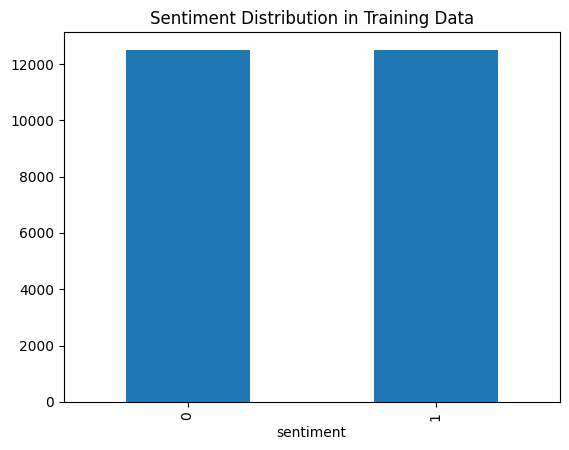

In [6]:
train_df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution in Training Data')


2. Text Preprocessing
* Tokenization and Lowercasing: Tokenize the text data and convert it to lowercase.



In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

train_df['review_processed'] = train_df['review'].apply(lambda x: word_tokenize(x.lower()))
test_df['review_processed'] = test_df['review'].apply(lambda x: word_tokenize(x.lower()))
train_df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment,review_processed
0,"b""This was an absolutely terrible movie. Don't...",0,"[b, '', this, was, an, absolutely, terrible, m..."
1,b'I have been known to fall asleep during film...,0,"[b, ', i, have, been, known, to, fall, asleep,..."
2,b'Mann photographs the Alberta Rocky Mountains...,0,"[b'mann, photographs, the, alberta, rocky, mou..."
3,b'This is the kind of film for a snowy Sunday ...,1,"[b'this, is, the, kind, of, film, for, a, snow..."
4,"b'As others have mentioned, all the women that...",1,"[b'as, others, have, mentioned, ,, all, the, w..."


* Removing Stop Words and Punctuation: Remove common stop words and punctuation from the text.

In [8]:
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    return [word for word in text if word not in stop_words and word not in string.punctuation]

train_df['review_processed'] = train_df['review_processed'].apply(preprocess)
test_df['review_processed'] = test_df['review_processed'].apply(preprocess)
train_df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,review_processed
0,"b""This was an absolutely terrible movie. Don't...",0,"[b, '', absolutely, terrible, movie, n't, lure..."
1,b'I have been known to fall asleep during film...,0,"[b, known, fall, asleep, films, usually, due, ..."
2,b'Mann photographs the Alberta Rocky Mountains...,0,"[b'mann, photographs, alberta, rocky, mountain..."
3,b'This is the kind of film for a snowy Sunday ...,1,"[b'this, kind, film, snowy, sunday, afternoon,..."
4,"b'As others have mentioned, all the women that...",1,"[b'as, others, mentioned, women, go, nude, fil..."


* Vectorization: Convert the preprocessed text into numerical features using techniques like Bag of Words (BoW) or TF-IDF.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorization
vectorizer = TfidfVectorizer(max_features=10000, preprocessor=lambda x: ' '.join(x))

X_train = vectorizer.fit_transform(train_df['review_processed'])
X_test = vectorizer.transform(test_df['review_processed'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']


3. Model Training and Evaluation
* Train-Test Split: If not already split, you may further split your training data for cross-validation.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


 4. Classification Techniques

Implement the following classifiers and train them on the dataset:

* Naive Bayes
* Logistic Regression
* Support Vector Machines (SVM)
* Random Forest
* K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifiers
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'{name} Accuracy: {accuracy:.2f}')


Naive Bayes Accuracy: 0.84
Logistic Regression Accuracy: 0.88
Random Forest Accuracy: 0.84


5. Model Evaluation
* Confusion Matrix and Classification Report: Generate a confusion matrix and classification report for each model.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'\n{name} Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print(f'\n{name} Classification Report:\n', classification_report(y_test, y_pred))


* Cross-Validation: Perform cross-validation for a more robust evaluation.

In [ ]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')


6. Conclusion
Summarize the results and discuss the strengths and weaknesses of each classification technique based on the performance metrics.

**Exercise**
1. How does lemmatization impact the accuracy of the classifiers?

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')  
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
  return [lemmatizer.lemmatize(word) for word in text]

train_df['review_processed'] = train_df['review_processed'].apply(lemmatize)
test_df['review_processed'] = test_df['review_processed'].apply(lemmatize)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, preprocessor=lambda x: ' '.join(x))

X_train = vectorizer.fit_transform(train_df['review_processed'])
X_test = vectorizer.transform(test_df['review_processed'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'{name} Accuracy: {accuracy:.2f}')

2. Implement a different vectorization technique, such as Word2Vec or GloVe embeddings. How does the change in vectorization method impact the performance of the classification models?

In [ ]:
from glove import Glove, Corpus

corpus = Corpus()
corpus.fit(train_df['review_processed'], window=5)

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

word_vectors = glove.word_vectors
word_vectors.shape

In [ ]:
X_train = vectorizer.fit_transform(train_df['review_processed'])
X_test = vectorizer.transform(test_df['review_processed'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'{name} Accuracy: {accuracy:.2f}')

3. Tune the hyperparameters for the SVM classifier using GridSearchCV or RandomizedSearchCV. What combination of hyperparameters yields the best performance, and why do you think this combination is optimal?

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

svm = SVC()

grid = GridSearchCV(svm, param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

4. Combine the classifiers using a Voting Classifier (ensemble method). Does the ensemble model outperform the individual classifiers in terms of accuracy and other performance metrics? Why might the ensemble model perform better or worse than the individual models?

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

log_clf = LogisticRegression()
nb_clf = MultinomialNB()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('nb', nb_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

print(voting_clf.score(X_test, y_test))